In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import kerastuner
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from kerastuner.engine.hyperparameters import HyperParameters as hp
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from PIL import Image,ImageStat
import pandas as pd
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_28/3829924157.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [2]:
df = pd.read_csv("../input/chinese-mnist/chinese_mnist.csv")

In [3]:
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [4]:
df.shape

(15000, 5)

In [5]:
df["value"]

0        9
1        9
2        9
3        9
4        9
        ..
14995    8
14996    8
14997    8
14998    8
14999    8
Name: value, Length: 15000, dtype: int64

In [6]:
print(f"Number of suites: {df.suite_id.nunique()}")
print(f"Samples: {df.sample_id.nunique()}: {list(df.sample_id.unique())}")
print(f"Characters codes: {df.code.nunique()}: {list(df.code.unique())}")
print(f"Characters: {df.character.nunique()}: {list(df.character.unique())}")
print(f"Numbers: {df.value.nunique()}: {list(df.value.unique())}")

Number of suites: 100
Samples: 10: [1, 10, 2, 3, 4, 5, 6, 7, 8, 9]
Characters codes: 15: [10, 11, 12, 13, 14, 15, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Characters: 15: ['九', '十', '百', '千', '万', '亿', '零', '一', '二', '三', '四', '五', '六', '七', '八']
Numbers: 15: [9, 10, 100, 1000, 10000, 100000000, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [7]:
print(f"frequence of each character:")
df.character.value_counts()

frequence of each character:


character
九    1000
十    1000
百    1000
千    1000
万    1000
亿    1000
零    1000
一    1000
二    1000
三    1000
四    1000
五    1000
六    1000
七    1000
八    1000
Name: count, dtype: int64

In [8]:
labels = [ [x - 1] for x in df['code'].values ]

In [9]:
y=np.array(labels)

In [10]:
y.shape

(15000, 1)

In [11]:
X = []
for row in range(df.shape[0]):
    suite_id = df["suite_id"].iloc[row]
    sample_id = df["sample_id"].iloc[row]
    code = df["code"].iloc[row]
    file_name = f"input_{suite_id}_{sample_id}_{code}.jpg"
    x =np.array(Image.open(f"../input/chinese-mnist/data/data/{file_name}"))
    X.append(x)
X = np.array(X)
X=X.reshape(15000,64,64,1)

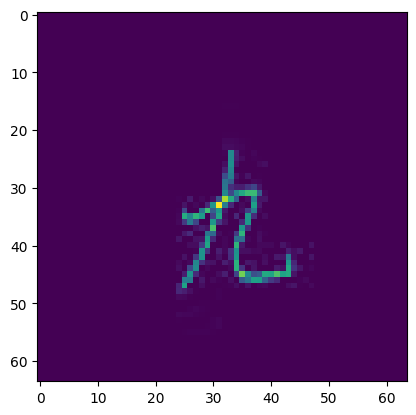

In [12]:
plt.imshow(X[1])

In [13]:
channel_means = np.mean(X)

In [14]:
channel_means

2.200134130859375

In [15]:
X=(X-channel_means)/255.000

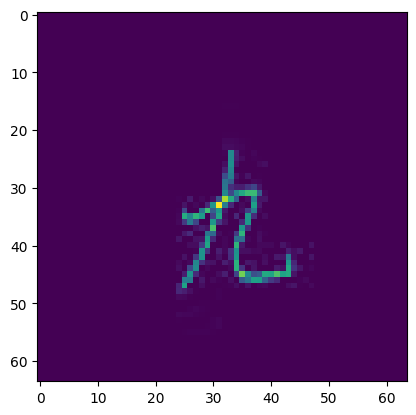

In [16]:
plt.imshow((X[1]))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(12000, 64, 64, 1)

In [19]:
X_test.shape

(3000, 64, 64, 1)

In [20]:
X_train=X_train.reshape(12000, 64, 64,1)
X_test=X_test.reshape(3000, 64, 64,1)

In [21]:
y_train.shape

(12000, 1)

In [22]:
y_train

array([[ 3],
       [ 3],
       [ 1],
       ...,
       [14],
       [ 9],
       [ 1]])

In [24]:
model = Sequential()
model.add(Conv2D(225, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(120, (3, 3), activation='relu'))
model.add(Conv2D(120, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(225, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(124, activation='relu'))
model.add(Dense(15))
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [25]:
a=model.fit(X_train, y_train, epochs = 45, batch_size=7,validation_data=(X_test, y_test))

Epoch 1/45
1715/1715 [==============================] - 27s 8ms/step - loss: 0.6615 - accuracy: 0.7821 - val_loss: 0.1539 - val_accuracy: 0.9470
Epoch 2/45
1715/1715 [==============================] - 14s 8ms/step - loss: 0.1671 - accuracy: 0.9502 - val_loss: 0.1144 - val_accuracy: 0.9610
Epoch 3/45
1715/1715 [==============================] - 13s 8ms/step - loss: 0.1087 - accuracy: 0.9686 - val_loss: 0.0845 - val_accuracy: 0.9760
Epoch 4/45
1715/1715 [==============================] - 13s 8ms/step - loss: 0.0748 - accuracy: 0.9788 - val_loss: 0.0810 - val_accuracy: 0.9750
Epoch 5/45
1715/1715 [==============================] - 13s 8ms/step - loss: 0.0586 - accuracy: 0.9835 - val_loss: 0.0403 - val_accuracy: 0.9893
Epoch 6/45
1715/1715 [==============================] - 14s 8ms/step - loss: 0.0670 - accuracy: 0.9821 - val_loss: 0.0584 - val_accuracy: 0.9850
Epoch 7/45
1715/1715 [==============================] - 13s 8ms/step - loss: 0.0510 - accuracy: 0.9858 - val_loss: 0.0730 - val_ac

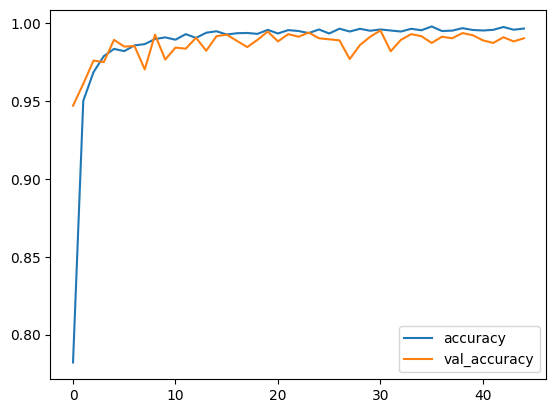

In [26]:
pd.DataFrame(a.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

In [42]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 7ms/step - loss: 0.1101 - accuracy: 0.9903


[0.11009006947278976, 0.9903333187103271]

In [43]:
y_test.shape

(3000, 1)

In [46]:
softmax_output = tf.nn.softmax(model.predict(X_test))

94/94 [==============================] - 1s 6ms/step


In [54]:
print(y_test)

[[5]
 [0]
 [7]
 ...
 [4]
 [8]
 [6]]


In [65]:
type(y_test)

numpy.ndarray

In [66]:
y_test=y_test.flatten().tolist()

In [68]:
y_pred=[]
for _ in range(3000):
    y_pred.append(np.argmax(softmax_output[_]))

In [69]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [70]:
confusion_matrix(y_test, y_pred)

array([[186,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   4, 201,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 198,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 194,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 206,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0, 201,   0,   1,   0,   0,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 199,   0,   1,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0, 187,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   1, 196,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 189,   0,   0,
       

In [74]:
precision = precision_score(y_test, y_pred, average='macro')
print("\nPrecision:", precision)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


Precision: 0.9903492712225254
Recall: 0.9906791727217178
